  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

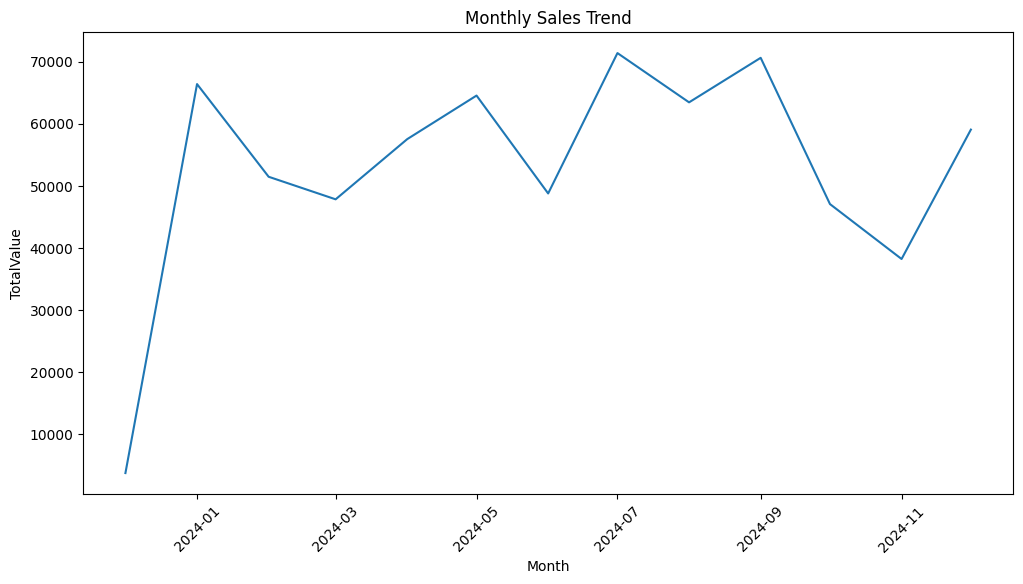

In [1]:
%pip install pandas
import pandas as pd

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Preview data
print(customers.head())
print(products.head())
print(transactions.head())

# Check for missing values
print("Customers missing values:\n", customers.isnull().sum())
print("Products missing values:\n", products.isnull().sum())
print("Transactions missing values:\n", transactions.isnull().sum())

# Remove duplicates
customers = customers.drop_duplicates()
transactions = transactions.drop_duplicates()

# Validate TotalValue = Quantity * Price
transactions['CalculatedTotal'] = transactions['Quantity'] * transactions['Price']
invalid_transactions = transactions[transactions['TotalValue'] != transactions['CalculatedTotal']]
print(f"Invalid transactions: {len(invalid_transactions)}")

# Monthly Sales Analysis
%pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Convert TransactionDate to datetime
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M').dt.to_timestamp()

# Aggregate and plot monthly sales
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum().reset_index()
monthly_sales = monthly_sales.sort_values('Month')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='TotalValue', data=monthly_sales)
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.show()